In [131]:
## what effect does time have on location, district, race, age 

In [132]:
import pandas as pd
from lib import standardize_item_numbers
import matplotlib.pyplot as plt
import numpy as np

def clean():
    dfa = pd.read_csv("../data/police_reports/electronic_police_report_2018_2022.csv")
    dfa = dfa.pipe(standardize_item_numbers, ["item_number"])

    dfb = pd.read_csv("../data/real_time_crime_center/rtcc.csv")
    dfb["footage_requested"] = "1"
    dfb = dfb.pipe(standardize_item_numbers, ["item_number"])

    df = pd.merge(dfa, dfb, on="item_number", how="outer")
    return df

In [133]:
df = clean()

C:\Users\PC\AppData\Local\Temp\ipykernel_7288\486123798.py:7: DtypeWarning: Columns (14,20,24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  dfa = pd.read_csv("../data/police_reports/electronic_police_report_2018_2022.csv")


In [134]:
df = df.drop_duplicates(subset=["offender_race", "offender_gender", "offender_age", "item_number"])

In [135]:
not_requested_df = df[~((df.footage_requested == "1"))]
df = df[((df.footage_requested == "1"))]

df.shape

(19265, 28)

In [136]:
datetimes = (df.occurred_date_time.str.replace(r"(\w{4})-(\w{1,2})-(\w{1,2})", r"\2/\3/\1").str.extract(r"(\w{2}):(\w{2}):?(\w{2})?"))
df.loc[:, "occurred_hour"] = datetimes[0]
df.occurred_hour.value_counts()

C:\Users\PC\AppData\Local\Temp\ipykernel_7288\485685656.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  datetimes = (df.occurred_date_time.str.replace(r"(\w{4})-(\w{1,2})-(\w{1,2})", r"\2/\3/\1").str.extract(r"(\w{2}):(\w{2}):?(\w{2})?"))


23    487
21    454
20    448
19    431
01    428
17    423
18    412
22    403
16    381
00    370
15    370
02    369
03    337
11    336
14    330
12    303
10    286
04    264
13    259
05    159
09    159
08    151
06    138
07    121
Name: occurred_hour, dtype: int64

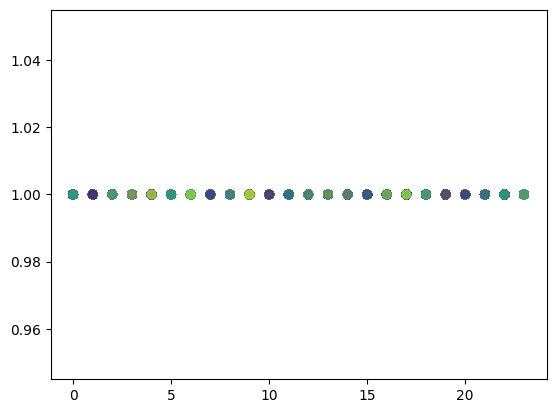

In [137]:
counts = pd.pivot_table(df, index=['occurred_hour'], values=['footage_requested'], aggfunc={'footage_requested': np.count_nonzero}).reset_index()


# x = counts[["occurred_hour"]]
# y = counts[["footage_requested"]]
COL=19265
colors = np.random.rand(COL)
x = df[["occurred_hour"]]
x = np.array(x).astype(float)
y = df[["footage_requested"]]
y = np.array(y).astype(float)
area = (30 * np.random.rand(COL))**2  # 0 to 15 point radii

plt.scatter(x, y, c=colors, alpha=0.5)
plt.show()


In [138]:
df.location.count().sum()

8488

In [139]:
df.shape

(19265, 29)

In [140]:
requested = df[df.footage_requested.isin(["1"])]

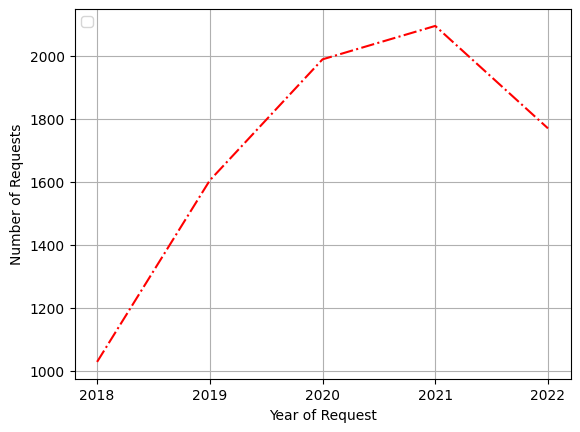

In [141]:
year_counts = pd.pivot_table(requested, index=['year'], values=['footage_requested'], aggfunc={'footage_requested': np.count_nonzero}).reset_index()
year_counts


axes = plt.axes()
# axes.set_xlim([-5, 5])
# axes.set_ylim([0, 1.0])
axes.set_xticks([2018, 2019, 2020, 2021, 2022])
# axes.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
axes.grid()


x = year_counts.year
x = np.array(x).astype(float)
y = year_counts.footage_requested
y = np.array(y).astype(float)

plt.xlabel('Year')
plt.ylabel('Number of Requests')
plt.legend(['Requests for RTCC Data'], loc=2)

plt.plot(x, y, 'r-.')
plt.show()


In [142]:
requested.year.value_counts()

2021.0    2095
2020.0    1989
2022.0    1770
2019.0    1605
2018.0    1029
Name: year, dtype: int64

In [143]:
requested.groupby("year").disposition.value_counts()

year    disposition
2018.0  OPEN            612
        CLOSED          396
        UNFOUNDED        21
2019.0  OPEN            938
        CLOSED          637
        UNFOUNDED        30
2020.0  OPEN           1423
        CLOSED          530
        UNFOUNDED        36
2021.0  OPEN           1545
        CLOSED          499
        UNFOUNDED        51
2022.0  OPEN           1276
        CLOSED          472
        UNFOUNDED        22
Name: disposition, dtype: int64

In [144]:
not_requested_df.groupby("year").disposition.value_counts()

year    disposition
2018.0  OPEN           51455
        CLOSED         21322
        UNFOUNDED        375
2019.0  OPEN           51235
        CLOSED         18231
        UNFOUNDED        458
2020.0  OPEN           46814
        CLOSED         10623
        UNFOUNDED        368
2021.0  OPEN           47268
        CLOSED          9396
        UNFOUNDED        561
2022.0  OPEN           40355
        CLOSED          7224
        UNFOUNDED        437
Name: disposition, dtype: int64

In [145]:
requested.groupby("year").disposition.value_counts(normalize=True)

year    disposition
2018.0  OPEN           0.594752
        CLOSED         0.384840
        UNFOUNDED      0.020408
2019.0  OPEN           0.584424
        CLOSED         0.396885
        UNFOUNDED      0.018692
2020.0  OPEN           0.715435
        CLOSED         0.266466
        UNFOUNDED      0.018100
2021.0  OPEN           0.737470
        CLOSED         0.238186
        UNFOUNDED      0.024344
2022.0  OPEN           0.720904
        CLOSED         0.266667
        UNFOUNDED      0.012429
Name: disposition, dtype: float64

In [146]:
not_requested_df.groupby("year").disposition.value_counts(normalize=True)

"""
2018: 59% open when requested vs 70 when not requested
2019: 58% vs 73%
2020: 71% vs 80
73 vs 82
72 vs 84
"""

'\n2018: 59% open when requested vs 70 when not requested\n2019: 58% vs 73%\n2020: 71% vs 80\n73 vs 82\n72 vs 84\n'

In [147]:
# r_ct = requested.groupby("year").disposition.value_counts().to_excel("../data/real_time_crime_center/requested_by_year_ct.xlsx")

In [148]:
# r_pct = requested.groupby("year").disposition.value_counts(normalize=True).to_excel("../data/real_time_crime_center/requested_by_year_pct.xlsx")

In [149]:
not_requested = df[~((df.footage_requested == "1.0"))]

In [150]:
not_requested.groupby("year").disposition.value_counts()

year    disposition
2018.0  OPEN            612
        CLOSED          396
        UNFOUNDED        21
2019.0  OPEN            938
        CLOSED          637
        UNFOUNDED        30
2020.0  OPEN           1423
        CLOSED          530
        UNFOUNDED        36
2021.0  OPEN           1545
        CLOSED          499
        UNFOUNDED        51
2022.0  OPEN           1276
        CLOSED          472
        UNFOUNDED        22
Name: disposition, dtype: int64

In [151]:
not_requested.groupby("year").disposition.value_counts(normalize=True)

year    disposition
2018.0  OPEN           0.594752
        CLOSED         0.384840
        UNFOUNDED      0.020408
2019.0  OPEN           0.584424
        CLOSED         0.396885
        UNFOUNDED      0.018692
2020.0  OPEN           0.715435
        CLOSED         0.266466
        UNFOUNDED      0.018100
2021.0  OPEN           0.737470
        CLOSED         0.238186
        UNFOUNDED      0.024344
2022.0  OPEN           0.720904
        CLOSED         0.266667
        UNFOUNDED      0.012429
Name: disposition, dtype: float64

In [152]:
r_ct = pd.DataFrame(not_requested.groupby("year").disposition.value_counts())
r_ct  = r_ct.rename(columns={r_ct.columns[0]: "requested_ct"})
r_ct = r_ct.reset_index()

r_pct = pd.DataFrame(not_requested.groupby("year").disposition.value_counts(normalize=True))
r_pct  = r_pct.rename(columns={r_pct.columns[0]: "requested_pct"})
r_pct = r_pct.reset_index()

nr_ct = pd.DataFrame(not_requested.groupby("year").disposition.value_counts())
nr_ct  = nr_ct.rename(columns={nr_ct.columns[0]: "not_requested_ct"})
nr_ct = nr_ct.reset_index()

nr_pct = pd.DataFrame(not_requested.groupby("year").disposition.value_counts(normalize=True))
nr_pct  = nr_pct.rename(columns={nr_pct.columns[0]: "not_requested_pct"})
nr_pct = nr_pct.reset_index()


In [153]:
dfs = pd.concat([nr_pct, nr_ct, r_pct, r_ct])

In [154]:
dfs

,year,disposition,not_requested_pct,not_requested_ct,requested_pct,requested_ct
0,2018.0,OPEN,0.594752,NaN,NaN,NaN
1,2018.0,CLOSED,0.384840,NaN,NaN,NaN
2,2018.0,UNFOUNDED,0.020408,NaN,NaN,NaN
3,2019.0,OPEN,0.584424,NaN,NaN,NaN
4,2019.0,CLOSED,0.396885,NaN,NaN,NaN
5,2019.0,UNFOUNDED,0.018692,NaN,NaN,NaN
6,2020.0,OPEN,0.715435,NaN,NaN,NaN
7,2020.0,CLOSED,0.266466,NaN,NaN,NaN
8,2020.0,UNFOUNDED,0.018100,NaN,NaN,NaN
9,2021.0,OPEN,0.737470,NaN,NaN,NaN


In [155]:
# df.to_excel("../data/real_time_crime_center/requests_per_year_2018_present.xlsx")